# Importing necessary libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#To ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.width' , None)

# Import Dataset

In [4]:
Titanic_df = pd.read_excel(r'C:\Users\Hp\Desktop\data science\Python\Datasets\Titanic_Survival.xls' , 
                           index_col = 0 , header = 0)
print(Titanic_df.shape)

(891, 11)


# EDA

In [6]:
Titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
Titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Feature selection

Eliminating below columns

Sibsp , parch , ticket , Fare , cabin and Embarked as these variables wont have an impact whether a person has survived or not

In [9]:
Titanic_df =Titanic_df[['Name' , 'Pclass' , 'Sex' , 'Age' , 'Survived']]

In [10]:
print(Titanic_df.shape)

(891, 5)


# Missing value check

In [11]:
Titanic_df.isnull().sum()

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

# Missing value imputation

In [12]:
Titanic_df['Age'].fillna(int(Titanic_df['Age'].mean()), inplace= True)
Titanic_df.isnull().sum()


Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

# Outlier check

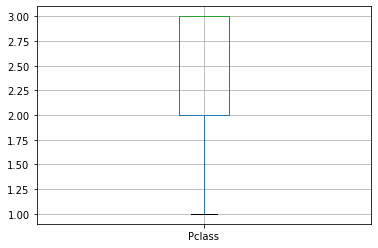

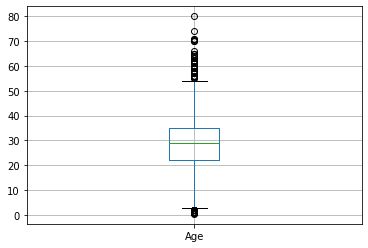

In [16]:
import matplotlib.pyplot as plt
colname=[]
for x in Titanic_df.columns[:-1]:
    if Titanic_df[x].dtype=="int64" or Titanic_df[x].dtype=="float64":
        colname.append(x)

for x in colname:
    Titanic_df.boxplot(column=x)
    plt.show()

We not impute a cluster of points as it will create baisness

# Converting categorical variable to numeric

In [17]:
from sklearn import preprocessing

colname =['Sex']

le = preprocessing.LabelEncoder()

for x in colname:
    Titanic_df[x] = le.fit_transform(Titanic_df[x])
    

In [18]:
Titanic_df.head()


,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",3,1,22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1
3,"Heikkinen, Miss. Laina",3,0,26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1
5,"Allen, Mr. William Henry",3,1,35.0,0


# Seperate X and Y

In [45]:
X = Titanic_df.values[: , 1:-1]
Y = Titanic_df.values[: , -1]
Y = Y.astype(int)

 Ignoring name variable while building model

# Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X) 
print(X)

[[ 0.82737724  0.73769513 -0.58165904]
 [-1.56610693 -1.35557354  0.64932701]
 [ 0.82737724 -1.35557354 -0.27391253]
 ...
 [ 0.82737724 -1.35557354 -0.04310264]
 [-1.56610693  0.73769513 -0.27391253]
 [ 0.82737724  0.73769513  0.18770724]]


# Train test split

In [47]:
from sklearn.model_selection import train_test_split

X_train ,X_test, Y_train, Y_test = train_test_split(X, Y , test_size =0.2 , random_state =10)

# Model building and prediction

In [48]:
#predicting using the KNeihbors_Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=4 , metric='euclidean')

#fit the model on the data and predict the values

model_KNN.fit(X_train , Y_train)

Y_pred = model_KNN.predict(X_test)

# Checking accuracy

In [49]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[107  10]
 [ 20  42]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       117
           1       0.81      0.68      0.74        62

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

Accuracy of the model: 0.8324022346368715


# Model tunning

We can tune 2 parameters

Metric(Distance) - it can be euclidean, manhattan , minkowski

n_neigbors(K value)

In [53]:
#predicting using the KNeihbors_Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))) , metric='euclidean')

#fit the model on the data and predict the values

model_KNN.fit(X_train , Y_train)

Y_pred = model_KNN.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[106  11]
 [ 24  38]]
Classification report :
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       117
           1       0.78      0.61      0.68        62

    accuracy                           0.80       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.80      0.80       179

Accuracy of the model: 0.8044692737430168


# Checking accuracy for different value of K

In [55]:
from sklearn.metrics import accuracy_score

for K in range(1,16):
    model_KNN = KNeighborsClassifier(K,metric="manhattan")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), 
        "for K-Value:",K)

Accuracy is  0.7486033519553073 for K-Value: 1
Accuracy is  0.8547486033519553 for K-Value: 2
Accuracy is  0.7988826815642458 for K-Value: 3
Accuracy is  0.8324022346368715 for K-Value: 4
Accuracy is  0.8212290502793296 for K-Value: 5
Accuracy is  0.8324022346368715 for K-Value: 6
Accuracy is  0.8379888268156425 for K-Value: 7
Accuracy is  0.8324022346368715 for K-Value: 8
Accuracy is  0.8379888268156425 for K-Value: 9
Accuracy is  0.8379888268156425 for K-Value: 10
Accuracy is  0.8324022346368715 for K-Value: 11
Accuracy is  0.8379888268156425 for K-Value: 12
Accuracy is  0.8435754189944135 for K-Value: 13
Accuracy is  0.8324022346368715 for K-Value: 14
Accuracy is  0.8379888268156425 for K-Value: 15


In [56]:
from sklearn.metrics import accuracy_score

for K in range(1,16):
    model_KNN = KNeighborsClassifier(K,metric="euclidean")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), 
        "for K-Value:",K)

Accuracy is  0.7486033519553073 for K-Value: 1
Accuracy is  0.8547486033519553 for K-Value: 2
Accuracy is  0.7988826815642458 for K-Value: 3
Accuracy is  0.8324022346368715 for K-Value: 4
Accuracy is  0.8268156424581006 for K-Value: 5
Accuracy is  0.8379888268156425 for K-Value: 6
Accuracy is  0.8435754189944135 for K-Value: 7
Accuracy is  0.8379888268156425 for K-Value: 8
Accuracy is  0.8379888268156425 for K-Value: 9
Accuracy is  0.8379888268156425 for K-Value: 10
Accuracy is  0.8324022346368715 for K-Value: 11
Accuracy is  0.8435754189944135 for K-Value: 12
Accuracy is  0.8435754189944135 for K-Value: 13
Accuracy is  0.8379888268156425 for K-Value: 14
Accuracy is  0.8435754189944135 for K-Value: 15


In [57]:
from sklearn.metrics import accuracy_score

for K in range(1,16):
    model_KNN = KNeighborsClassifier(K,metric="minkowski")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), 
        "for K-Value:",K)

Accuracy is  0.7486033519553073 for K-Value: 1
Accuracy is  0.8547486033519553 for K-Value: 2
Accuracy is  0.7988826815642458 for K-Value: 3
Accuracy is  0.8324022346368715 for K-Value: 4
Accuracy is  0.8268156424581006 for K-Value: 5
Accuracy is  0.8379888268156425 for K-Value: 6
Accuracy is  0.8435754189944135 for K-Value: 7
Accuracy is  0.8379888268156425 for K-Value: 8
Accuracy is  0.8379888268156425 for K-Value: 9
Accuracy is  0.8379888268156425 for K-Value: 10
Accuracy is  0.8324022346368715 for K-Value: 11
Accuracy is  0.8435754189944135 for K-Value: 12
Accuracy is  0.8435754189944135 for K-Value: 13
Accuracy is  0.8379888268156425 for K-Value: 14
Accuracy is  0.8435754189944135 for K-Value: 15
